In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import datetime # manage time, especially conversion from datetime to timestamp numbers
import lasio # pip install lasio
from scipy.interpolate import interp1d

In [2]:
%matplotlib notebook

In [3]:
if Path.home().name in ['pwavodij']: # Joshua
    Dropbox_folder = Path(Path.home(), 'Dropbox','Other_Project_Portfolios','BOB data')

# Loading Data

## WABI_06

In [4]:
# lasfile='Well_32_1.las'
txtfile='WABI-06.txt'

lines = open(txtfile).read().splitlines()
lines

['~VERSION INFORMATION',
 'VERS.                 2.0:   CWLS LOG ASCII STANDARD',
 'WRAP.                  NO:   ONE LINE PER DEPTH STEP',
 '~WELL INFORMATION BLOCK',
 '#MNEM.UNIT            DATA              DESCRIPTION OF MNEMONIC',
 '#---------    -------------------    ------------------------------',
 'STRT.M        150.1140               :START DEPTH',
 'STOP.M        4490.9232              :STOP DEPTH',
 'STEP.M        0.1524                 :STEP LENGTH',
 'NULL.         -999.2500              :NULL VALUE',
 'COMP.         TOTAL                  :COMPANY',
 'WELL.         WABI-06               :WELL',
 'FLD .         FNG00098               :FIELD ',
 'LOC .         6.6658X 5.2308Y        :LOCATION ',
 'STAT.                                :STATE',
 'CTRY.                                :COUNTRY ',
 'CNTY.                                :COUNTY ',
 'API .                                :API',
 'SRVC.                                :SERVICE COMPANY',
 'DATE.         29-NOV-12    

In [5]:
# count the line numbers
curves_names_start=24 
curves_names_end=39
log_data_start=40

#Read the name of the curves from txt and write them in csv file:
curves=[]
for line in lines[curves_names_start:curves_names_end]: # picks the line intervals with the curves
        curves.append(line.split()[0].split(' ')[0])
        header=str(curves).replace("['","").replace("']","").replace("', '"," ")
f=open('Well_06.csv','w') # stores the file as csv
f.write(header +'\n') # writes the headers

# #Then read the log data which starts at line 40 and write in the csv file
for text in lines[log_data_start:]:
        f.write(str(text).replace("['","").replace("']","")+'\n')
f.close()

# READING THE CSV

In [23]:
# Reading the csv file
df=pd.read_csv('Well_06.csv',delim_whitespace=True, na_values=-999.25)
df.head()

,DEPTH.M,TVDSS.M,TVD.M,TPNL.V/V,STEM.DEGF,SNP2.B/E,SEXP.OHMM,SESP.OHMM,SEMP.OHMM,SEDP.OHMM,SCO2.G/CC,SCAL.IN,SBD2.G/CC,GR.GAPI,ECD;1.SG
0,150.1140,128.5097,150.1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3660,1.0600
1,150.2664,128.6621,150.2621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9763,1.0600
2,150.4188,128.8145,150.4145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9438,1.0600
3,150.5712,128.9669,150.5669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.9100,1.0681
4,150.7236,129.1193,150.7193,NaN,92.0883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5073,1.0618


In [24]:
# displays all the statistical description of the columns
df.describe()

,DEPTH.M,TVDSS.M,TVD.M,TPNL.V/V,STEM.DEGF,SNP2.B/E,SEXP.OHMM,SESP.OHMM,SEMP.OHMM,SEDP.OHMM,SCO2.G/CC,SCAL.IN,SBD2.G/CC,GR.GAPI,ECD;1.SG
count,28484.000000,28484.000000,28484.000000,3873.000000,12128.000000,3847.000000,16835.000000,16838.000000,16842.000000,16837.000000,3847.000000,3732.000000,3847.000000,28402.000000,28384.000000
mean,2320.518600,2184.561448,2206.161449,0.152898,107.232456,2.701508,35.245735,31.201283,37.545908,74.454635,0.070103,8.725717,2.346209,70.453690,2.660573
std,1253.149671,1103.226097,1103.226097,0.093206,8.638264,0.636079,107.212617,110.514855,151.684282,266.047715,0.030762,0.782911,0.120198,49.323933,58.371713
min,150.114000,128.509700,150.109700,0.055600,91.940000,1.969800,0.708300,0.596000,0.653200,0.582300,0.015200,8.250000,2.149500,2.300000,1.000000
25%,1235.316300,1213.708825,1235.308900,0.088200,101.660000,2.215350,2.625450,2.286050,2.642650,2.296300,0.056200,8.560000,2.249300,23.131375,1.070000
50%,2320.518600,2294.664550,2316.264550,0.109400,106.160000,2.322700,5.018900,4.380900,5.199350,4.534700,0.062900,8.612900,2.280000,57.565750,1.230000
75%,3405.720900,3328.835250,3350.435175,0.191200,113.180000,3.248350,19.642450,19.441400,22.763200,25.329600,0.076200,8.683725,2.476650,120.463200,1.240000
max,4490.923200,3533.729000,3555.328900,0.579900,136.580000,5.820300,1456.741900,2000.000000,2283.896200,2000.000000,0.346800,17.478800,2.670200,277.384900,3073.143600


In [25]:
# displays all the columns header in the dataframe
df.columns.values

array(['DEPTH.M', 'TVDSS.M', 'TVD.M', 'TPNL.V/V', 'STEM.DEGF', 'SNP2.B/E',
       'SEXP.OHMM', 'SESP.OHMM', 'SEMP.OHMM', 'SEDP.OHMM', 'SCO2.G/CC',
       'SCAL.IN', 'SBD2.G/CC', 'GR.GAPI', 'ECD;1.SG'], dtype=object)

# SIMPLE DATA PROCESSING AND PLOTS

In [42]:
#This keeps all data below a threshold
#Gamma Ray Log
threshold = 200 #gAPI
df=df[df['GR.GAPI']<threshold].copy()

In [43]:
# Equivalent Circulating Density
threshold==2
df=df[df['ECD;1.SG']<threshold].copy()

<IPython.core.display.Javascript object>


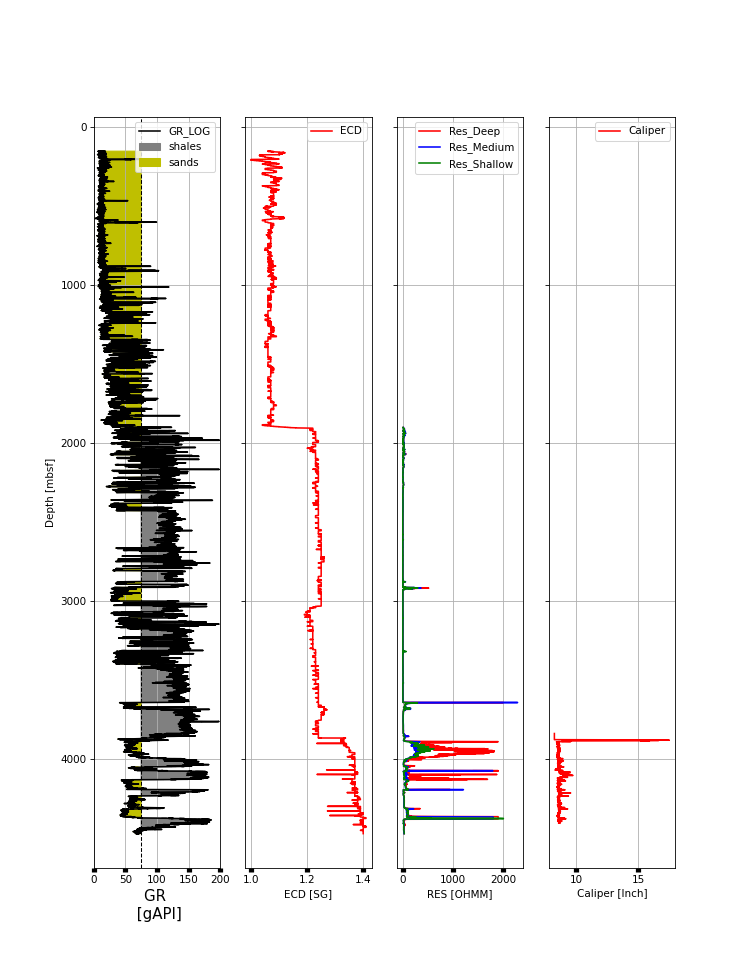

In [51]:
fig,axs=plt.subplots(1,4,figsize=(10,13), sharey=True)

ax=axs[0]
ax.plot(df['GR.GAPI'],df['DEPTH.M'], label='GR_LOG', c='k')
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('GR [gAPI]')
ax.set_ylabel('Depth [mbsf]')

ax.set_xlim(0,200)
ax.set_xlabel('GR \n [gAPI]', fontsize='x-large')
ax.grid()
ax.fill_betweenx(df['DEPTH.M'],df['GR.GAPI'],75,
                           where=df['GR.GAPI']>75,interpolate=True,color='gray', label='shales')
ax.fill_betweenx(df['DEPTH.M'],df['GR.GAPI'],75,
                           where=df['GR.GAPI']<75,interpolate=True,color='y', label='sands')
ax.axvline(75,color='k',linewidth=1,linestyle='--')
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.plot(df['ECD;1.SG'],df['DEPTH.M'], label='ECD', c='r')
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('ECD [SG]')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.plot(df['SEDP.OHMM'],df['DEPTH.M'], label='Res_Deep', c='r')
ax.plot(df['SEMP.OHMM'],df['DEPTH.M'], label='Res_Medium', c='b')
ax.plot(df['SESP.OHMM'],df['DEPTH.M'], label='Res_Shallow', c='g')
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('RES [OHMM]')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.plot(df['SCAL.IN'],df['DEPTH.M'], label='Caliper', c='r')
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('Caliper [Inch]')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

<IPython.core.display.Javascript object>


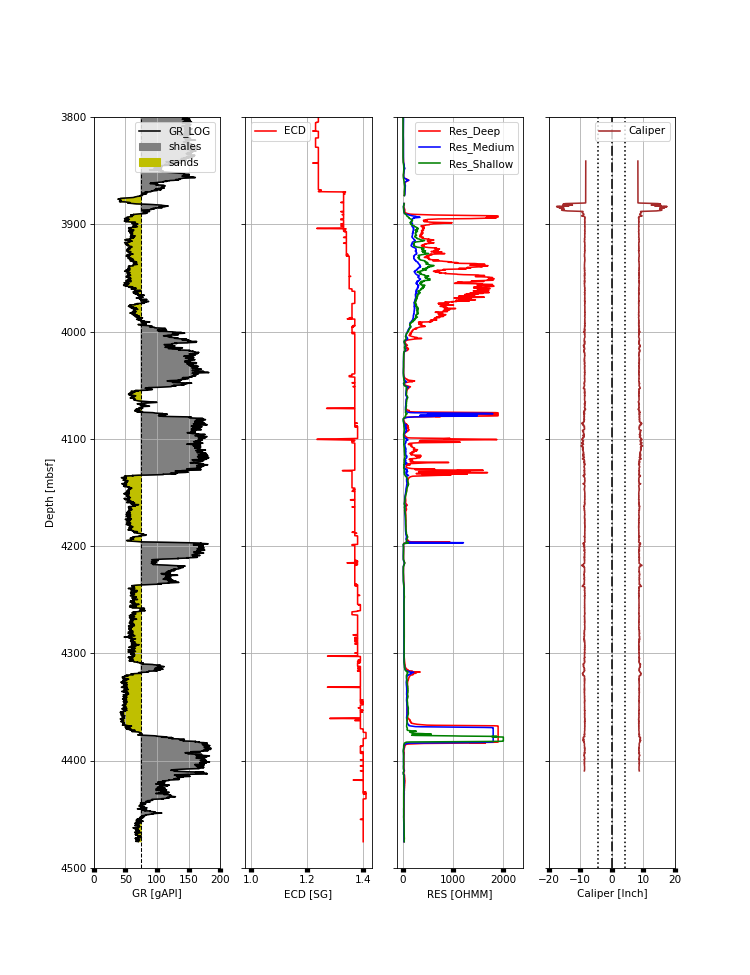

In [63]:
fig,axs=plt.subplots(1,4,figsize=(10,13), sharey=True)

ax=axs[0]
ax.plot(df['GR.GAPI'],df['DEPTH.M'], label='GR_LOG', c='k')
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('GR [gAPI]')
ax.set_ylabel('Depth [mbsf]')

ax.set_xlim(0,200)
ax.set_ylim(3800,4500)
ax.grid()
ax.fill_betweenx(df['DEPTH.M'],df['GR.GAPI'],75,
                           where=df['GR.GAPI']>75,interpolate=True,color='gray', label='shales')
ax.fill_betweenx(df['DEPTH.M'],df['GR.GAPI'],75,
                           where=df['GR.GAPI']<75,interpolate=True,color='y', label='sands')
ax.axvline(75,color='k',linewidth=1,linestyle='--')
ax.spines["top"].set_position(("axes", 1.0))
ax.legend(loc='upper right')
ax.invert_yaxis()

ax=axs[1]
ax.plot(df['ECD;1.SG'],df['DEPTH.M'], label='ECD', c='r')
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('ECD [SG]')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.plot(df['SEDP.OHMM'],df['DEPTH.M'], label='Res_Deep', c='r')
ax.plot(df['SEMP.OHMM'],df['DEPTH.M'], label='Res_Medium', c='b')
ax.plot(df['SESP.OHMM'],df['DEPTH.M'], label='Res_Shallow', c='g')
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('RES [OHMM]')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]

bs=8.5
h1=ax.plot(df['SCAL.IN'],df['DEPTH.M'], label='Caliper', c='brown')
ax.plot(-df['SCAL.IN'],df['DEPTH.M'], c='brown')
ax.axvline(0,ls='-.',color='k')
ax.axvline(bs/2,ls=':',color='k')
ax.axvline(-bs/2,ls=':',color='k')
ax.set_xlim(-20, 20)
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('Caliper [Inch]')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# DUMP FILE AS PICKLE

In [15]:
import pickle

In [16]:
# save pickle data
pickle.dump(df, open("1a_time_series_df.pickle","wb"))